In [1]:
from IPython.display import clear_output

# installing tensorFlow datasets libraries
!pip install tensorflow datasets

# Clear the output after the installation process to keep the notebook clean
clear_output()

In [2]:
# importing necessary packages
import tensorflow as tf
from transformers import TFAutoModel, AutoTokenizer
from datasets import load_dataset
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import random

In [3]:
# Loading the pre-trained BERT model ("bert-base-uncased") from Hugging Face's Transformers library

BERT_model = TFAutoModel.from_pretrained("bert-base-uncased")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [4]:
# The tokenizer converts text into the format required by BERT, including token IDs, attention masks
tokenizer_for_text = AutoTokenizer.from_pretrained("bert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [5]:
# Tokenizing a list of sentences using the BERT tokenizer
input = tokenizer_for_text(['Hello world', 'Hi how are you'], padding=True, truncation=True,
                  return_tensors='tf')

In [6]:
input

{'input_ids': <tf.Tensor: shape=(2, 6), dtype=int32, numpy=
array([[ 101, 7592, 2088,  102,    0,    0],
       [ 101, 7632, 2129, 2024, 2017,  102]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(2, 6), dtype=int32, numpy=
array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(2, 6), dtype=int32, numpy=
array([[1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1]], dtype=int32)>}

In [7]:
# Passing the tokenized inputs through the pre-trained BERT model
output = BERT_model(input)

In [8]:
output

TFBaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=<tf.Tensor: shape=(2, 6, 768), dtype=float32, numpy=
array([[[-0.16888338,  0.13606317, -0.13940048, ..., -0.6251124 ,
          0.05217258,  0.36714536],
        [-0.36327428,  0.14121838,  0.8799863 , ...,  0.1043303 ,
          0.2887567 ,  0.37267867],
        [-0.6985949 , -0.69879764,  0.06450213, ..., -0.22103655,
          0.00986852, -0.5939797 ],
        [ 0.83098346,  0.1236672 , -0.15119052, ...,  0.10309628,
         -0.6779264 , -0.26285213],
        [-0.40266627, -0.01928282,  0.5732499 , ..., -0.20656854,
          0.02338545,  0.20126297],
        [-0.6228407 , -0.2745354 ,  0.18117562, ..., -0.12944865,
         -0.03839097, -0.05733195]],

       [[ 0.09286568, -0.02636383, -0.12239324, ..., -0.21063548,
          0.17386365,  0.17250982],
        [ 0.40742064, -0.05931018,  0.5523468 , ..., -0.6790569 ,
          0.65557426, -0.29456508],
        [-0.21155252, -0.6858645 , -0.46280813, ...,  0.1527852 

In [9]:
# Loading the dataset
emotions_data = load_dataset('SetFit/emotion')

Repo card metadata block was not found. Setting CardData to empty.


Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [10]:
emotions_data

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 2000
    })
})

In [11]:
# Function to tokenize a batch of text data
def tokenize(batch):
    return tokenizer_for_text(batch["text"], padding=True, truncation=True)

In [12]:
# Applying the tokenize function to the entire dataset
emotions_encoded = emotions_data.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [13]:
emotions_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'label_text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'label_text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [14]:
# View the samples of the dataset
print("First 10 samples of the dataset:")
for i in range(10):
    print(f"Sample {i+1}:")
    print(f"Text: {emotions_data['train'][i]['text']}")
    print(f"Label: {emotions_data['train'][i]['label']}")
    print("---")

First 10 samples of the dataset:
Sample 1:
Text: i didnt feel humiliated
Label: 0
---
Sample 2:
Text: i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake
Label: 0
---
Sample 3:
Text: im grabbing a minute to post i feel greedy wrong
Label: 3
---
Sample 4:
Text: i am ever feeling nostalgic about the fireplace i will know that it is still on the property
Label: 2
---
Sample 5:
Text: i am feeling grouchy
Label: 3
---
Sample 6:
Text: ive been feeling a little burdened lately wasnt sure why that was
Label: 0
---
Sample 7:
Text: ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny
Label: 5
---
Sample 8:
Text: i feel as confused about life as a teenager or as jaded as a year old man
Label: 4
---
Sample 9:
Text: i have been with petronas for years i feel that petronas has performed well and made a huge profit
Label: 1
---
Sample 10:
Text: i feel romantic too
Label: 2
--

In [15]:
# Setting the 'input_ids', 'attention_mask', 'token_type_ids', and 'label' columns
# to TensorFlow format. This allows direct usage of these columns as `tf.Tensor` objects.

emotions_encoded.set_format('tf',
                            columns=['input_ids', 'attention_mask', 'token_type_ids', 'label'])

# setting BATCH_SIZE.
BATCH_SIZE = 64


# Defining a helper function 'order' to group BERT inputs into a single dictionary.
# This function will also separate the labels from the inputs.

def order(inp):

    data = list(inp.values()) # Convert the dictionary values into a list for easy indexing.
    return {
        'input_ids': data[1],  # BERT's input token IDs.
        'attention_mask': data[2],  # Attention mask to differentiate padding from actual data.
        'token_type_ids': data[3]   # Token type IDs for distinguishing sentence pairs in BERT.
    }, data[0]            # The label associated with the input.


# Converting 'train' split of `emotions_encoded` to TensorFlow format.
train_dataset = tf.data.Dataset.from_tensor_slices(emotions_encoded['train'][:])

# Setting  batch size to 64 and shuffling  training dataset with a buffer size 1000.
train_dataset = train_dataset.batch(BATCH_SIZE).shuffle(1000)

# Mapping  'order' function to the train dataset to organize inputs and labels.
train_dataset = train_dataset.map(order, num_parallel_calls=tf.data.AUTOTUNE)

# Performing similar steps for the test dataset: converting to TensorFlow format,
test_dataset = tf.data.Dataset.from_tensor_slices(emotions_encoded['test'][:])
test_dataset = test_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.map(order, num_parallel_calls=tf.data.AUTOTUNE)

In [16]:
inp, out = next(iter(train_dataset))# Retrieve a single batch of data from  training dataset using iterator.
print(inp, '\n\n', out)

{'input_ids': <tf.Tensor: shape=(64, 87), dtype=int64, numpy=
array([[  101,  1045,  2514, ...,     0,     0,     0],
       [  101,  1045,  2514, ...,     0,     0,     0],
       [  101,  1045,  5223, ...,     0,     0,     0],
       ...,
       [  101,  1045,  3342, ...,     0,     0,     0],
       [  101,  1045,  2179, ...,     0,     0,     0],
       [  101, 10047,  4030, ...,     0,     0,     0]])>, 'attention_mask': <tf.Tensor: shape=(64, 87), dtype=int64, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])>, 'token_type_ids': <tf.Tensor: shape=(64, 87), dtype=int64, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])>} 

 tf.Tensor(
[2 1 3 0 3 4 4 1 0 0 0 0 1 

In [17]:
class BERTForClassification(tf.keras.Model):
    '''
    Custom Keras model class for text classification using BERT.
    Inherits from tf.keras.Model to leverage TensorFlow's model-building
    and training functionalities.
    '''

    def __init__(self, bert_model, num_classes):
        '''
        Initializes the BERT-based classification model.

        Parameters:
        bert_model (tf.keras.Model): The pre-trained BERT model.
        num_classes (int): Number of output classes for classification.
        '''
        super().__init__()
        # Assign the pre-trained BERT model to  'bert' attribute
        self.bert = bert_model
        # Add a Dense layer with softmax activation to predict class probabilities
        # 'num_classes' is the number of emotion categories
        self.fc = tf.keras.layers.Dense(num_classes, activation='softmax')

    def call(self, inputs):
        '''
        Forward pass of the model. Takes input tensors and performs
        a forward pass through the BERT model and then through the Dense layer.

        Parameters:
        inputs (dict): A dictionary containing 'input_ids', 'attention_mask',
                       and 'token_type_ids' tensors.

        Returns:
        tf.Tensor: Output probabilities for each class.
        '''
        # Pass the inputs through the BERT model to obtain embeddings
        # BERT returns a tuple where the second element ([1]) is the pooled output
        x = self.bert(inputs)[1]
        # Pass the pooled output through the Dense layer to get class probabilities
        return self.fc(x)


In [18]:
# Create an instance of the BERT-based classification model
classifier = BERTForClassification(BERT_model, num_classes=6)

# Compile the model with the specified optimizer, loss function, and metrics
classifier.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  # Adam optimizer with a small learning rate for fine-tuning
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),  # Loss function for multi-class classification with integer labels
    metrics=['accuracy']  # Metric to evaluate model performance based on the accuracy of predictions
)

In [19]:
# Train the BERT-based classification model
history = classifier.fit(
    train_dataset,   # The training dataset to use for training the model
    epochs=3         # Number of epochs to train the model
)


Epoch 1/3
250/250 [==============================] - 332s 1s/step - loss: 1.0223 - accuracy: 0.6234
Epoch 2/3
250/250 [==============================] - 289s 1s/step - loss: 0.2777 - accuracy: 0.9019
Epoch 3/3
250/250 [==============================] - 288s 1s/step - loss: 0.1633 - accuracy: 0.9324


In [20]:
# Evaluate the model on the test dataset
loss, accuracy = classifier.evaluate(test_dataset)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

32/32 [==============================] - 13s 284ms/step - loss: 0.1643 - accuracy: 0.9215
Test Loss: 0.1642625331878662, Test Accuracy: 0.921500027179718


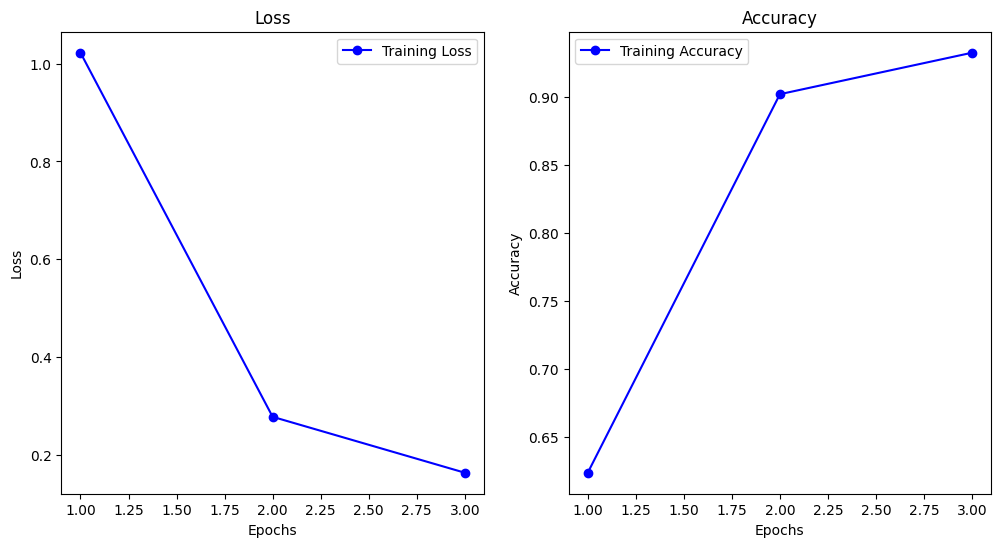

In [21]:

# Plotting Loss and Accuracy
def plot_training_history(history):
    # get loss and accuracy values
    history_dict = history.history
    epochs = range(1, len(history_dict['loss']) + 1)

    # Loss
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history_dict['loss'], 'bo-', label='Training Loss')
    if 'val_loss' in history_dict:
        plt.plot(epochs, history_dict['val_loss'], 'ro-', label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history_dict['accuracy'], 'bo-', label='Training Accuracy')
    if 'val_accuracy' in history_dict:
        plt.plot(epochs, history_dict['val_accuracy'], 'ro-', label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

# Call the function
plot_training_history(history)


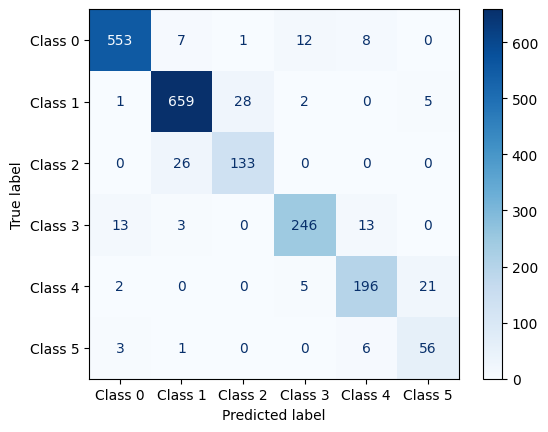

In [22]:
#confusion matrix

def plot_confusion_matrix(model, dataset):
    # initialize lists to store true labels and predicted labels
    y_true = []
    y_pred = []

    # iterate over the dataset to collect true labels and predictions
    for batch in dataset:
        inputs, labels = batch
        predictions = model(inputs, training=False)
        predicted_labels = tf.argmax(predictions, axis=1).numpy()
        y_pred.extend(predicted_labels)
        y_true.extend(labels.numpy())

    # gets the confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=range(6))

    # confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[f'Class {i}' for i in range(6)])
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

# Call the function
plot_confusion_matrix(classifier, test_dataset)


In [23]:

def inspect_predictions(dataset, model, tokenizer_for_text, num_samples=5):
    # Convert the dataset to a list to randomly select batches
    dataset_list = list(dataset)

    # Randomly select a batch
    random_batch = random.choice(dataset_list)

    inputs, labels = random_batch

    # Get model predictions
    predictions = model(inputs, training=False)
    predicted_labels = tf.argmax(predictions, axis=1).numpy()
    true_labels = labels.numpy()

    # Define class labels
    class_labels = {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}

    # Convert numeric predictions to class names
    predicted_class_names = [class_labels[label] for label in predicted_labels]
    true_class_names = [class_labels[label] for label in true_labels]

    # Print sample predictions
    for i in range(min(num_samples, len(predicted_class_names))):
        # Decode input_ids to text
        decoded_text = tokenizer_for_text.decode(inputs['input_ids'][i], skip_special_tokens=True)
        print(f"Text: {decoded_text}")
        print(f"True Label: {true_class_names[i]}")
        print(f"Predicted Class: {predicted_class_names[i]}\n")

# Inspect predictions on a random batch from the test dataset
inspect_predictions(test_dataset, classifier, tokenizer_for_text)


Text: i am feeling relieved to feel myself again
True Label: joy
Predicted Class: joy

Text: i sometimes feel a bit unwelcome
True Label: sadness
Predicted Class: sadness

Text: i feel complacent at the moment
True Label: joy
Predicted Class: joy

Text: i feel most passionate about that arouse my emotions seem to be the things i need to learn something about my emotion tells me there is a need to grow in some direction
True Label: love
Predicted Class: love

Text: i feel that it only makes you a person that i love who happened to do something that i don t find acceptable
True Label: joy
Predicted Class: joy

